In [1]:
raw_data <- read.csv("SSL_RAT_RACE_CODE_20_30.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 100459

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 100459

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
500,1,20-30,0,1,4,1,1,1.0,1,0
500,1,20-30,4,3,0,1,0,-1.1,0,1
500,1,20-30,3,5,2,1,0,0.4,1,0
500,1,20-30,0,5,1,0,1,0.7,1,0
500,1,20-30,4,4,1,1,1,-0.3,0,0
500,1,20-30,1,0,3,1,8,0.2,3,0


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
#SSL_SCORE
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,71719,315.8281,0.08677257
1,28740,308.0776,0.08793673


In [7]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE_RANK = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE_RANK,STD_ERROR
0,71719,124153.2,206.1104
1,28740,142788.4,257.5014


In [8]:
# T-test without PSM for SSL_SCORE and RACE_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 62.736, df = 81130, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7.508369 7.992647
sample estimates:
mean in group 0 mean in group 1 
       315.8281        308.0776 


In [9]:
# T-test without PSM for SSL_SCORE_RANK and RACE_CODE_CD
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -56.499, df = 66433, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19281.68 -17988.74
sample estimates:
mean in group 0 mean in group 1 
       124153.2        142788.4 


In [10]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [11]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All         71719   28740
Matched     28740   28740
Unmatched   42979       0
Discarded       0       0


In [12]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

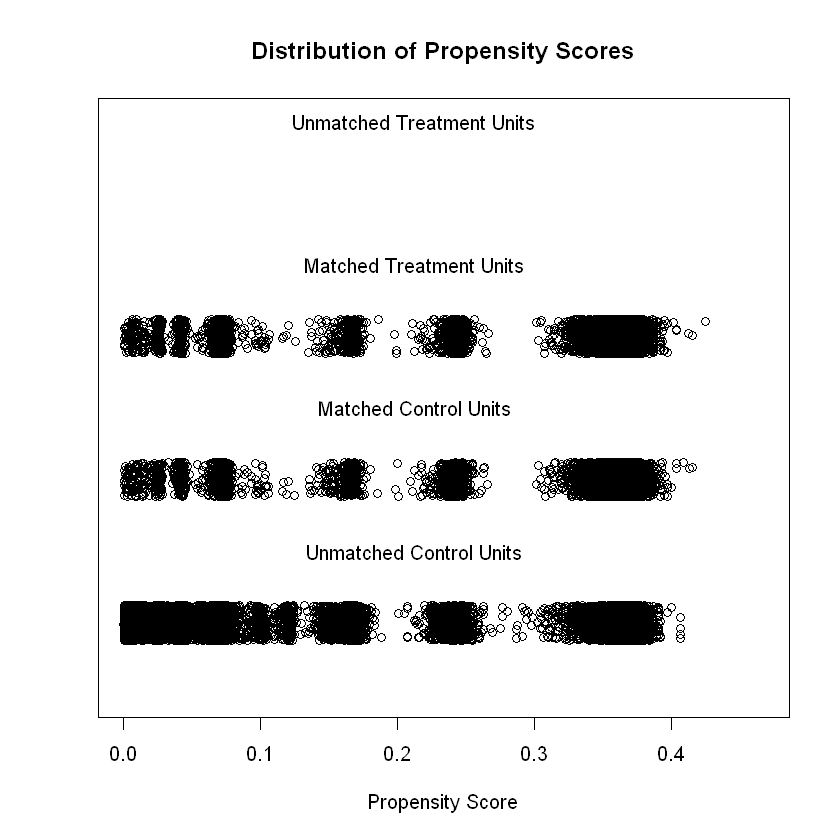

In [13]:
plot(mod_match, type = "jitter")

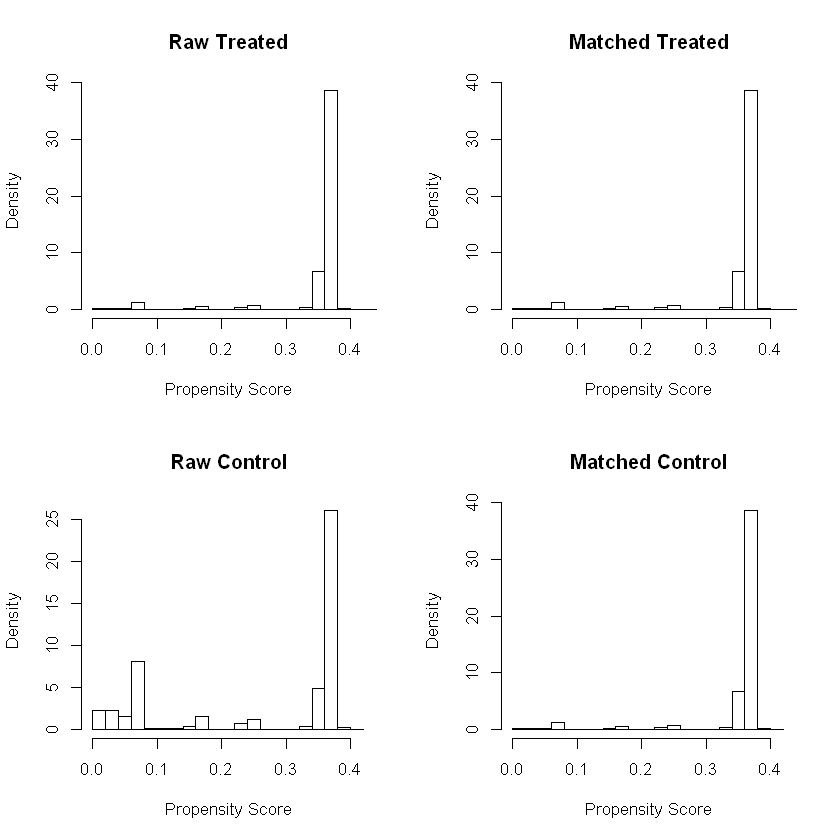

In [14]:
plot(mod_match, type = "hist")

In [15]:
head(matched)

,SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
2,500,1,20-30,4,3,0,1,0,-1.1,0,1,9.814903e-06,1
15,500,1,20-30,0,9,1,1,0,1.0,0,1,3.288896e-06,1
24,500,1,20-30,3,4,2,1,3,-0.7,1,0,2.473240e-06,1
49,474,334,20-30,0,2,3,1,2,-0.8,1,0,8.718288e-04,1
89,456,579,20-30,3,4,0,1,1,-2.8,0,0,1.216283e-05,1
98,455,604,20-30,2,2,2,1,3,0.7,0,1,1.533357e-04,1


In [16]:
# Doing T - test on matched records
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK



In [17]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)


In [18]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 6.7633, df = 57458, p-value = 1.362e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.603028 1.095163
sample estimates:
mean in group 0 mean in group 1 
       308.9267        308.0776 


In [19]:
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -6.8971, df = 57469, p-value = 5.361e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3246.012 -1809.385
sample estimates:
mean in group 0 mean in group 1 
       140260.7        142788.4 
